> POSENET

**PoseNet** is a deep learning TensorFlow model is used in trackting human poses

This notebook highlights implementation computer vision technique in identifying keypoints and tracking the human posture in yoga poses. 

Feedback on this notebook will be highly appreciated.

In [1]:
!git clone https://github.com/rwightman/posenet-pytorch
%cd posenet-pytorch

[WinError 2] The system cannot find the file specified: 'posenet-pytorch'
C:\Users\Ahsan\Documents\GitHub\posenet


'git' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os
import cv2
import torch
import posenet
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
!pip install tfjs-graph-converter

     |████████████████████████████████| 64 kB 1.4 MB/s 


In [4]:
import torch
from posenet.constants import *
from posenet.decode_multi import decode_multiple_poses
from posenet.models.model_factory import load_model
from posenet.utils import *

net = load_model(101)
net = net.cuda()
output_stride = net.output_stride
scale_factor = 1.0

Cannot find models file ./_models/mobilenet_v1_101.pth, converting from tfjs...
Weights for checkpoint mobilenet_v1_101 are not downloaded. Downloading to /tmp/_posenet_weights ...


In [5]:
def posenet_model(file):
    input_image, draw_image, output_scale = posenet.read_imgfile(file, scale_factor=scale_factor, output_stride=output_stride)
    with torch.no_grad():
        input_image = torch.Tensor(input_image).cuda()

        heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = net(input_image)

        pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
            heatmaps_result.squeeze(0),
            offsets_result.squeeze(0),
            displacement_fwd_result.squeeze(0),
            displacement_bwd_result.squeeze(0),
            output_stride=output_stride,
            max_pose_detections=10,
            min_pose_score=0.25)
        
        #Find keypoints on the image
        image = plt.imread(file)
        poses = []
        
        for pi in range(len(pose_scores)):
            if pose_scores[pi] != 0.:
                print('Pose #%d, score = %f' % (pi, pose_scores[pi]))       
                keypoints = keypoint_coords.astype(np.int32) 
                print(keypoints[pi])
                poses.append(keypoints[pi])
        
        #Show keypoints on the image
        img = plt.imread(file)
        i=0
        pose = poses[0]
        plt.imshow(img)    
        for y,x in pose:
            plt.plot(x, y, 'w.') 
            plt.text(x, y, str(i), color='r', fontsize=10)
            i+=1   
        plt.show()

In [6]:
file = '/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/warrior2/00000125.jpg'

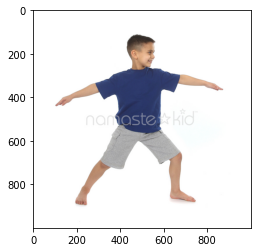

In [7]:
import matplotlib.pyplot as plt
img = plt.imread(file)
plt.imshow(img)
plt.show()

/kaggle/working/posenet-pytorch/posenet/decode_multi.py:31: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  max_loc_idx = max_loc.nonzero()


Pose #0, score = 0.280073
[[214 548]
 [195 548]
 [193 530]
 [205 550]
 [202 469]
 [299 552]
 [309 397]
 [315 684]
 [357 285]
 [335 784]
 [391 177]
 [564 541]
 [567 428]
 [672 647]
 [796 382]
 [825 649]
 [915 383]]


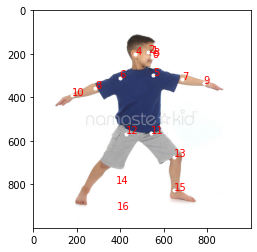

In [8]:
posenet_model(file)

In [9]:
file2 = '/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/goddess/00000100.jpg'
file3 = '/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/tree/00000077.jpg'

Pose #0, score = 0.252343
[[382 482]
 [367 458]
 [372 449]
 [391 452]
 [407 428]
 [475 473]
 [526 409]
 [545 529]
 [624 388]
 [597 520]
 [688 435]
 [653 564]
 [661 499]
 [715 622]
 [709 423]
 [787 636]
 [772 414]]


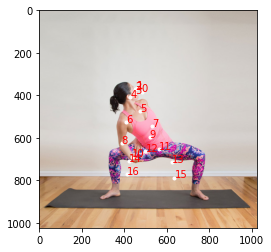

In [10]:
posenet_model(file2)

Pose #0, score = 0.469252
[[158 210]
 [158 214]
 [161 204]
 [158 226]
 [178 200]
 [181 261]
 [211 210]
 [133 267]
 [244 220]
 [ 98 236]
 [236 212]
 [311 292]
 [299 263]
 [377 256]
 [331 219]
 [468 263]
 [336 236]]


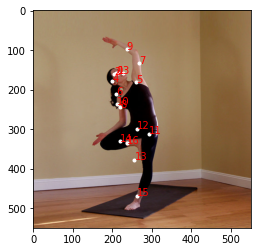

In [11]:
posenet_model(file3)